### 1. Import important loibraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### 2. Loading the dataset

In [2]:
# our dataset is in the same folder as my notebook/script
data = pd.read_csv("credit_card_data_headers.csv")

# Check first few rows
print(data.head())

  A1\tA2\tA3\tA8\tA9\tA10\tA11\tA12\tA14\tA15\tR1
0        1\t30.83\t0\t1.25\t1\t0\t1\t1\t202\t0\t1
1    0\t58.67\t4.46\t3.04\t1\t0\t6\t1\t43\t560\t1
2      0\t24.5\t0.5\t1.5\t1\t1\t0\t1\t280\t824\t1
3     1\t27.83\t1.54\t3.75\t1\t0\t5\t0\t100\t3\t1
4    1\t20.17\t5.625\t1.71\t1\t1\t0\t1\t120\t0\t1


In [3]:
# let's separate our data colmuns
data = pd.read_csv("credit_card_data_headers.csv", sep='\t')
# Check first few rows
print(data.head())

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


In [4]:
data.columns

Index(['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A14', 'A15', 'R1'], dtype='object')

In [6]:
for col in data.columns:
    unique_vals = data[col].nunique()
    print(f"Column: {col} => Unique values: {unique_vals}")

Column: A1 => Unique values: 2
Column: A2 => Unique values: 341
Column: A3 => Unique values: 213
Column: A8 => Unique values: 131
Column: A9 => Unique values: 2
Column: A10 => Unique values: 2
Column: A11 => Unique values: 23
Column: A12 => Unique values: 2
Column: A14 => Unique values: 164
Column: A15 => Unique values: 230
Column: R1 => Unique values: 2


* From the unique values of the columns above, we can see that four predictor features are binary variables(A1,A9,A10,A12), six features are continuous variables(A2,A3,A8,A11,A14,A15), and the response variable is binary(R1).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      654 non-null    int64  
 1   A2      654 non-null    float64
 2   A3      654 non-null    float64
 3   A8      654 non-null    float64
 4   A9      654 non-null    int64  
 5   A10     654 non-null    int64  
 6   A11     654 non-null    int64  
 7   A12     654 non-null    int64  
 8   A14     654 non-null    int64  
 9   A15     654 non-null    int64  
 10  R1      654 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 56.3 KB


In [10]:
data.describe()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.689602,31.578349,4.830558,2.241690,0.535168,0.561162,2.498471,0.538226,180.084098,1012.730887,0.452599
std,0.463010,11.981789,5.023295,3.369197,0.499143,0.496625,4.965655,0.498918,168.315719,5249.320660,0.498129
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,0.165000,0.000000,0.000000,0.000000,0.000000,70.750000,0.000000,0.000000
50%,1.000000,28.460000,2.855000,1.000000,1.000000,1.000000,0.000000,1.000000,160.000000,5.000000,0.000000
75%,1.000000,38.250000,7.437500,2.615000,1.000000,1.000000,3.000000,1.000000,271.000000,399.000000,1.000000
max,1.000000,80.250000,28.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2000.000000,100000.000000,1.000000


In [29]:
# checking the missing value
data.isnull().sum()

A1     0
A2     0
A3     0
A8     0
A9     0
A10    0
A11    0
A12    0
A14    0
A15    0
R1     0
dtype: int64

### 3. Separate features and target

In [11]:
X = data.iloc[:, :-1]  # predictor variables
y = data.iloc[:, -1]   # target (binary)

### 4. Split data into train/validation/test

In [12]:
# Split the data: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split temp into 50% validation, 50% test → 20% each of total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Train size: 392
Validation size: 131
Test size: 131


### 5. Standardize Continuous Features (important for KNN)

In [13]:
# Continuous features
cont_features = ['A2','A3','A8','A11','A14','A15']

scaler = StandardScaler()
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_val[cont_features] = scaler.transform(X_val[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])

### 6. K-Nearest Neighbors (KNN) with Cross-Validation

In [14]:
# Try different k values
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Best k
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k, "with CV accuracy:", max(cv_scores))


Best k: 7 with CV accuracy: 0.8316455696202532


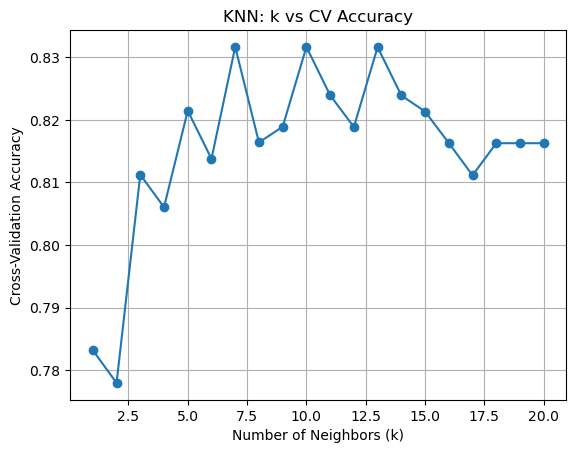

In [ ]:
import matplotlib.pyplot as plt

# k_values and cv_scores

plt.figure()
plt.plot(list(k_values), cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: k vs CV Accuracy')
plt.grid(True)
plt.show()


### 7. Decision Tree (DT) with Cross-Validation

In [17]:
# Try different max_depth values
depth_values = range(1, 11)
dt_scores = []

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Best depth
best_depth = depth_values[np.argmax(dt_scores)]
print("Best max_depth:", best_depth, "with CV accuracy:", max(dt_scores))


Best max_depth: 1 with CV accuracy: 0.8596559558584875


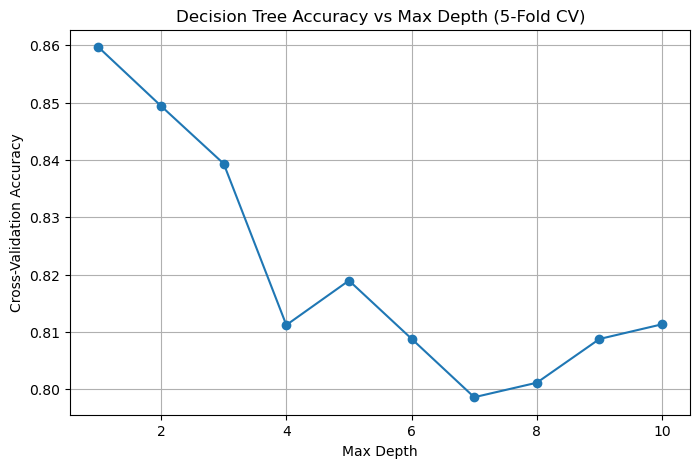

In [18]:
# Plot DT model performance vs max_depth
plt.figure(figsize=(8, 5))
plt.plot(depth_values, dt_scores, marker='o')
plt.title("Decision Tree Accuracy vs Max Depth (5-Fold CV)")
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.show()

A9     1.0
A1     0.0
A2     0.0
A3     0.0
A8     0.0
A10    0.0
A11    0.0
A12    0.0
A14    0.0
A15    0.0
dtype: float64


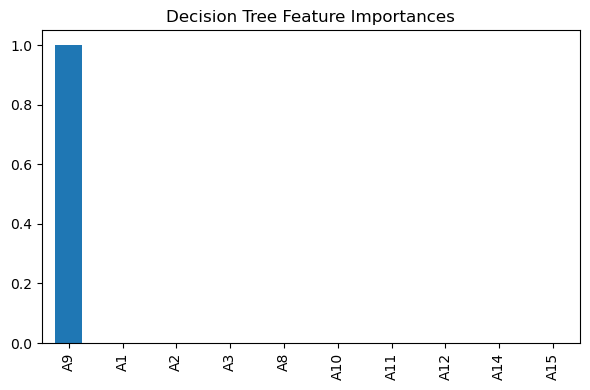

In [35]:
# Feature importances (Decision Tree)
feat_imp = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)
plt.figure(figsize=(6,4))
feat_imp.plot(kind='bar')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

* from the graph we can see best_depth = 1, DecisionTreeClassifier(max_depth=1)
* A Decision Tree with max_depth = 1 means the tree is only allowed one split.So the model selects only one feature.

* In our case, the model determined: A9 is the single most informative feature for classifying credit approval.
* generally we can deduce that A9 alone explains 100% of the model’s predictive capability.

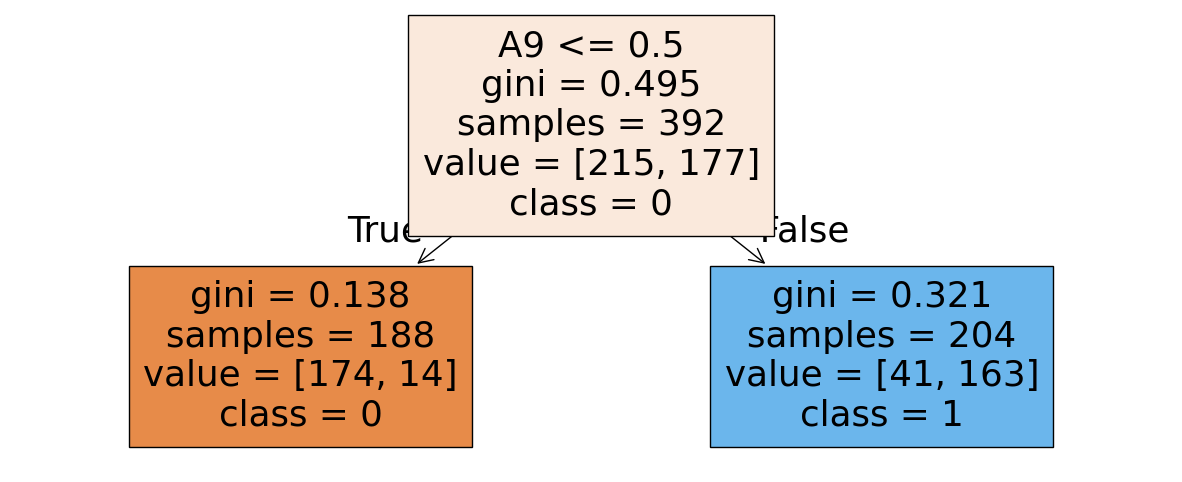

In [37]:
# graphically here is a small readable tree (if depth is small)
plt.figure(figsize=(15,6))
plot_tree(best_dt, feature_names=X.columns, class_names=['0','1'], filled=True, max_depth=3)
plt.show()

A9     0.529072
A3     0.135725
A2     0.093169
A11    0.067289
A8     0.053250
A14    0.051720
A15    0.043188
A12    0.014568
A1     0.012018
A10    0.000000
dtype: float64


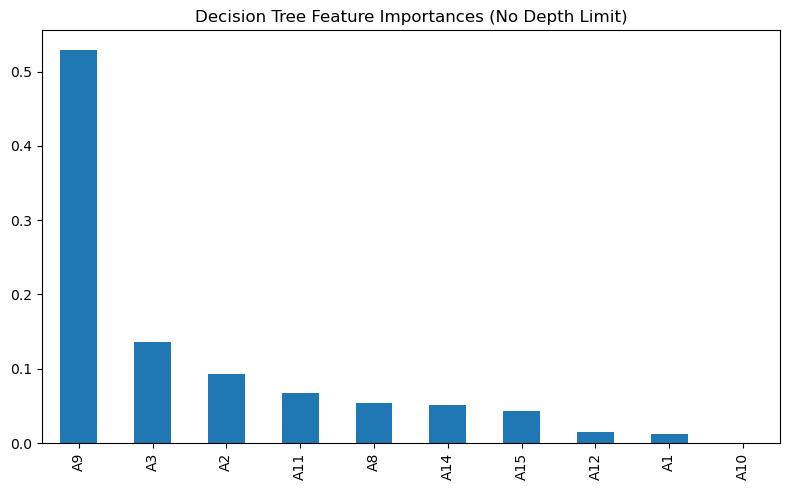

In [38]:
# Let me remove the maximum depth and check feature importance 
dt2 = DecisionTreeClassifier(max_depth=None, random_state=42)
dt2.fit(X_train, y_train)

feat_imp2 = pd.Series(dt2.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp2)

plt.figure(figsize=(8,5))
feat_imp2.plot(kind='bar')
plt.title('Decision Tree Feature Importances (No Depth Limit)')
plt.tight_layout()
plt.show()

* A9 alone explains more than 52% of the model’s predictive capability, it’s likely the main risk indicator (e.g., past default history, payment delay behavior, or credit utilization)

### 8. Evaluate on Validation Set

In [20]:
from sklearn.metrics import accuracy_score, precision_score, classification_report,recall_score, f1_score, confusion_matrix

# Train best KNN
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_val_pred_knn = best_knn.predict(X_val)

# Train best DT
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)
y_val_pred_dt = best_dt.predict(X_val)

# Validation metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    
print_metrics(y_val, y_val_pred_knn, "KNN")
print_metrics(y_val, y_val_pred_dt, "Decision Tree")


--- KNN ---
Accuracy: 0.8396946564885496
Precision: 0.8421052631578947
Recall: 0.8
F1-score: 0.8205128205128205
Confusion Matrix:
 [[62  9]
 [12 48]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        71
           1       0.84      0.80      0.82        60

    accuracy                           0.84       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.84      0.84      0.84       131

--- Decision Tree ---
Accuracy: 0.8854961832061069
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888
Confusion Matrix:
 [[56 15]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        71
           1       0.80      1.00      0.89        60

    accuracy                           0.89       131
   macro avg       0.90      0.89      0.89       131
weighted avg       0.91      0.89      0.89       131



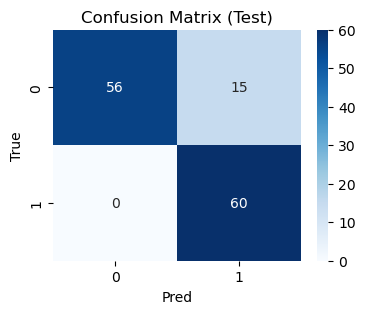

In [32]:
# Confusion matrix heatmap (test)
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pred')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

### 9. Final Test Evaluation

In [31]:
# using Decision Tree
y_test_pred = best_dt.predict(X_test)
print_metrics(y_test, y_test_pred, "Decision Tree (Test Set)")

--- Decision Tree (Test Set) ---
Accuracy: 0.8473282442748091
Precision: 0.7746478873239436
Recall: 0.9322033898305084
F1-score: 0.8461538461538461
Confusion Matrix:
 [[56 16]
 [ 4 55]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        72
           1       0.77      0.93      0.85        59

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.86      0.85      0.85       131



### 10. Save Final Model

In [41]:
import joblib

# Save the final decision tree model
joblib.dump(best_dt, "best_decision_tree.joblib")

print("Final Model saved successfully")


Final Model saved successfully


### **Observations**

1. **K-Nearest Neighbors (KNN, k = 7)**

   * Achieves a strong overall performance with balanced precision and recall (≈ 0.84 each).
   * However, it still misses **12 positive cases** (false negatives), meaning some risky customers are incorrectly classified as safe.

2. **Decision Tree Classifier (max_depth = 1)**

   * Shows **perfect recall (1.0)** — successfully identifies **all** positive/default cases.
   * Precision is slightly lower due to **15 false positives**, meaning some safe customers are incorrectly labeled as high-risk.
   * This trade-off often aligns with business priorities where **minimizing missed-risk cases** is critical.

3. **Model Comparison by Accuracy**

   * Decision Tree performs better overall with an accuracy of **0.885**, compared to **0.840** for KNN.
   * Indicates stronger predictive capability on the validation set.

### **Model Selection Recommendation**

✔ **Choose the Decision Tree** for final testing and deployment.
Reason: It ensures **100% detection of high-risk customers**, while maintaining good precision and the highest accuracy among the evaluated models.


* With further **optimization** and **richer features**, precision can be improved without sacrificing recall, making this a strong baseline model for deployment in real-world credit evaluation workflows.